**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Análisis Avanzado de Datos

**Departamento:** Ingeniería Aeroespacial

**Facultad de Ingeniería - Universidad de Antioquia**

# Tipo de Datos - Parte 2

In [ ]:
import pandas as pd
import io
import requests
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas_datareader.data as web

## Continuación de los Datos Cuantitativos: Diagramas de caja y violines

In [ ]:
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/adult.data"
download = requests.get(url).content
columnas = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_table(io.StringIO(download.decode('utf-8')), sep=',', 
                     names = columnas, decimal = ',', header = None) 
# Esimportante codificarlo a utf-8
display(data.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
Data_Cuantitativo = data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
display(Data_Cuantitativo)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


### Diagrama de Cajas

Es un gráfico univariado que detecta los valores atípicos u outliers característica por característica o también, si lo desean, categoría por categoría de cada característica de la base de datos. El método puede comparar las distribuciones de los datos entre los diferentes grupos de datos que se desee analizar.

**Construcción de boxplots:**

1. Dibujar una caja cuyas fronteras de la caja es el cuartil más bajo y el cuartil más grande de una característica de los datos. En este caso, el 50% de los datos de una característica están dentro de la caja.
2. Dibujar la mediana de los datos de una característica como una línea sólida y la media como una línea punteada.
3. Dibujar "bigotes" desde cada extremo del recuadro hasta el punto más alejado que NO sea un dato atípico u outlier.
4. Mostrar los valores atípicos como "?" o ""dependiendo de si están fuera de la caja respectivamente. Se recomienda etiquetar si es posible los datos atípicos.

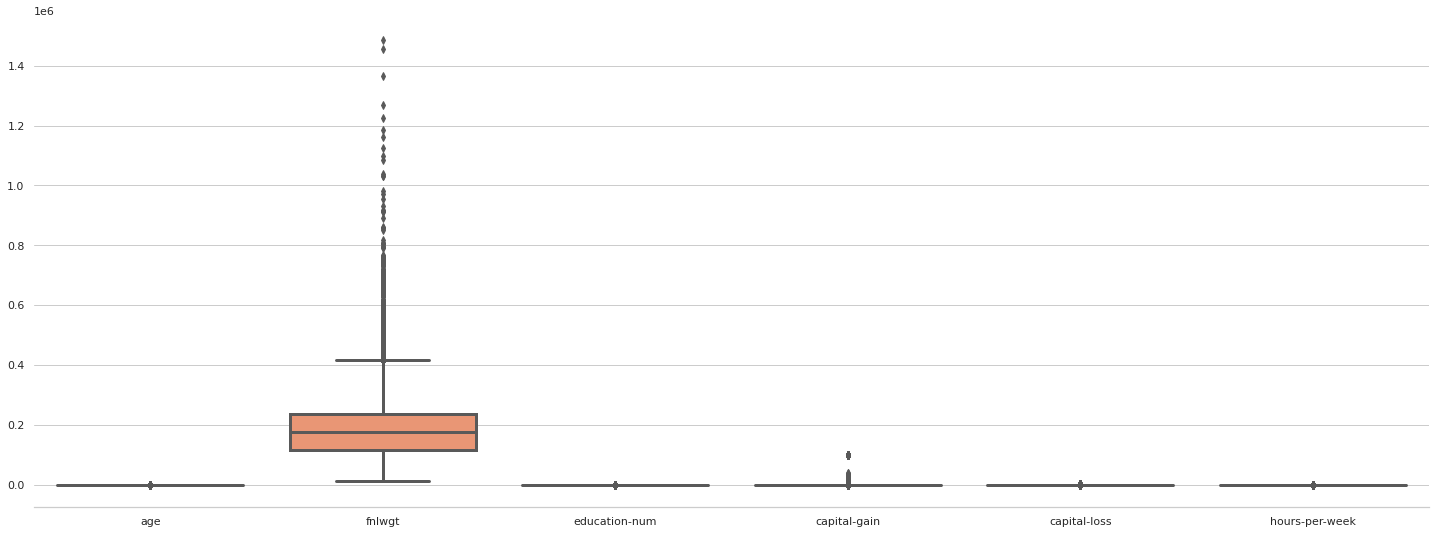

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = Data_Cuantitativo, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

Obsercen que hay grandes diferencias en la escala de valores de cada característica. Para mejorar la visualización de los datos, se aplica una normalización:

In [ ]:
Data_Cuantitativo_Normalizado = (Data_Cuantitativo - Data_Cuantitativo.min())/(Data_Cuantitativo.max() - Data_Cuantitativo.min()) 

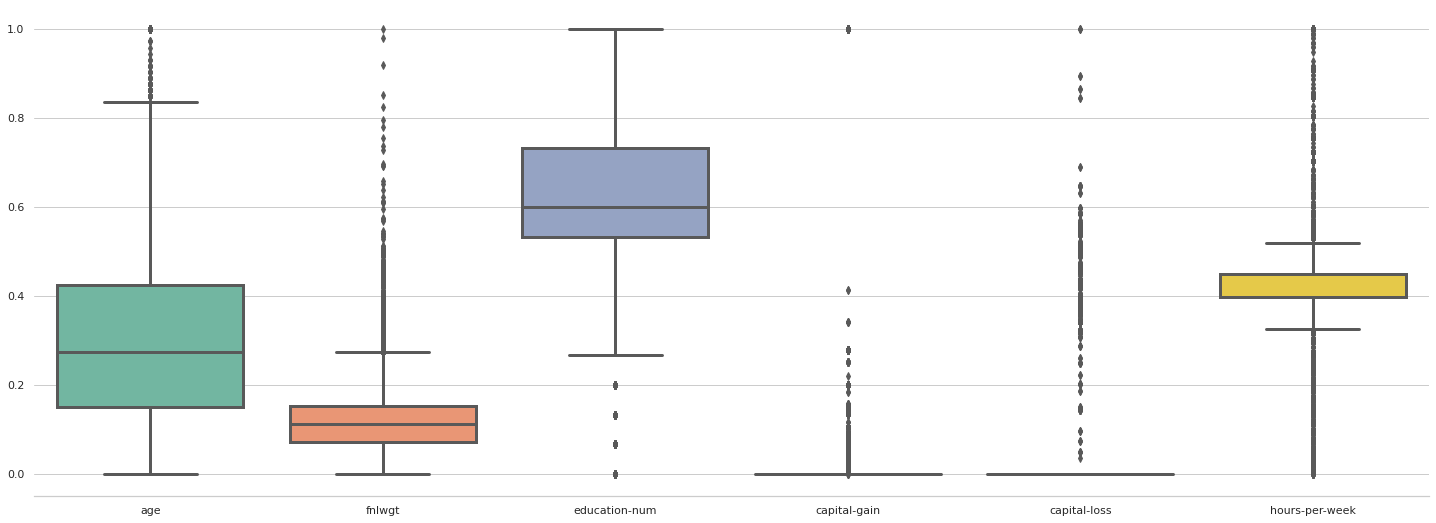

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = Data_Cuantitativo_Normalizado, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

Analicemos la característica **Education-num**. Se observan que hay algunos datos atípicos, con valores menores a 0.2. Analicemos si los eliminamos de nuestra base de datos con un umbral de decisión:

In [ ]:
Data_Cuantitativo_Normalizado["education-num"][Data_Cuantitativo_Normalizado["education-num"] < 0.2]

56       0.133333
160      0.066667
195      0.133333
221      0.066667
224      0.000000
           ...   
32359    0.000000
32403    0.066667
32413    0.133333
32425    0.066667
32432    0.000000
Name: education-num, Length: 552, dtype: float64

In [ ]:
Data_Cuantitativo_Normalizado["education-num"].describe()

count    32561.000000
mean         0.605379
std          0.171515
min          0.000000
25%          0.533333
50%          0.600000
75%          0.733333
max          1.000000
Name: education-num, dtype: float64

In [ ]:
Data_Cuantitativo_Normalizado["education-num"][Data_Cuantitativo_Normalizado["education-num"] < 0.2] = 0.2 
# Se eliminaran los datos menores a 0.2 que serían atípicos
# para la característica Education-num

In [ ]:
Data_Cuantitativo_Normalizado["education-num"].describe()

count    32561.000000
mean         0.607062
std          0.166883
min          0.200000
25%          0.533333
50%          0.600000
75%          0.733333
max          1.000000
Name: education-num, dtype: float64

Se observa que se eliminaron algunos datos atípicos de la característica **education-num** (ver min). Vamos a eliminar ahora los datos atípicos de las características **age**, **fnlwgt**, **capital-gain**, **capital-loss** y **hours-per-week**

In [ ]:
Data_Cuantitativo_Normalizado["age"][Data_Cuantitativo_Normalizado["education-num"] >= 0.82]

5        0.273973
8        0.191781
19       0.356164
20       0.315068
47       0.369863
           ...   
32539    0.739726
32544    0.191781
32548    0.657534
32553    0.205479
32554    0.493151
Name: age, Length: 2712, dtype: float64

In [ ]:
Data_Cuantitativo_Normalizado["fnlwgt"][Data_Cuantitativo_Normalizado["fnlwgt"] >= 0.3]

37       0.361178
40       0.336582
157      0.327310
177      0.320216
182      0.422065
           ...   
32205    0.462355
32208    0.358307
32286    0.316506
32470    0.321529
32511    0.341228
Name: fnlwgt, Length: 619, dtype: float64

In [ ]:
Data_Cuantitativo_Normalizado["capital-gain"][Data_Cuantitativo_Normalizado["capital-gain"] >= 0.02]

0        0.021740
8        0.140841
9        0.051781
59       0.050131
60       0.024070
           ...   
32466    0.150242
32515    0.034710
32518    1.000000
32538    0.150202
32560    0.150242
Name: capital-gain, Length: 2562, dtype: float64

In [ ]:
Data_Cuantitativo_Normalizado["capital-loss"][Data_Cuantitativo_Normalizado["capital-loss"] >= 0.02]

23       0.468779
32       0.323232
52       0.436639
93       0.361111
96       0.436639
           ...   
32441    0.433196
32443    0.367769
32445    0.383150
32458    0.453857
32500    0.202020
Name: capital-loss, Length: 1519, dtype: float64

In [ ]:
Data_Cuantitativo_Normalizado["hours-per-week"][Data_Cuantitativo_Normalizado["hours-per-week"] >= 0.5]
Data_Cuantitativo_Normalizado["hours-per-week"][Data_Cuantitativo_Normalizado["hours-per-week"] <= 0.3]

1        0.122449
6        0.153061
12       0.295918
21       0.193878
34       0.142857
           ...   
32542    0.244898
32544    0.295918
32545    0.193878
32553    0.102041
32559    0.193878
Name: hours-per-week, Length: 5245, dtype: float64

In [ ]:
Data_Cuantitativo_Normalizado["age"][Data_Cuantitativo_Normalizado["age"] >= 0.82] = 0.82
Data_Cuantitativo_Normalizado["fnlwgt"][Data_Cuantitativo_Normalizado["fnlwgt"] >= 0.3] = 0.3
Data_Cuantitativo_Normalizado["capital-gain"][Data_Cuantitativo_Normalizado["capital-gain"] >= 0.02] = 0.02
Data_Cuantitativo_Normalizado["capital-loss"][Data_Cuantitativo_Normalizado["capital-loss"] >= 0.02] = 0.02
Data_Cuantitativo_Normalizado["hours-per-week"][Data_Cuantitativo_Normalizado["hours-per-week"] >= 0.5] = 0.5
Data_Cuantitativo_Normalizado["hours-per-week"][Data_Cuantitativo_Normalizado["hours-per-week"] <= 0.3] = 0.3

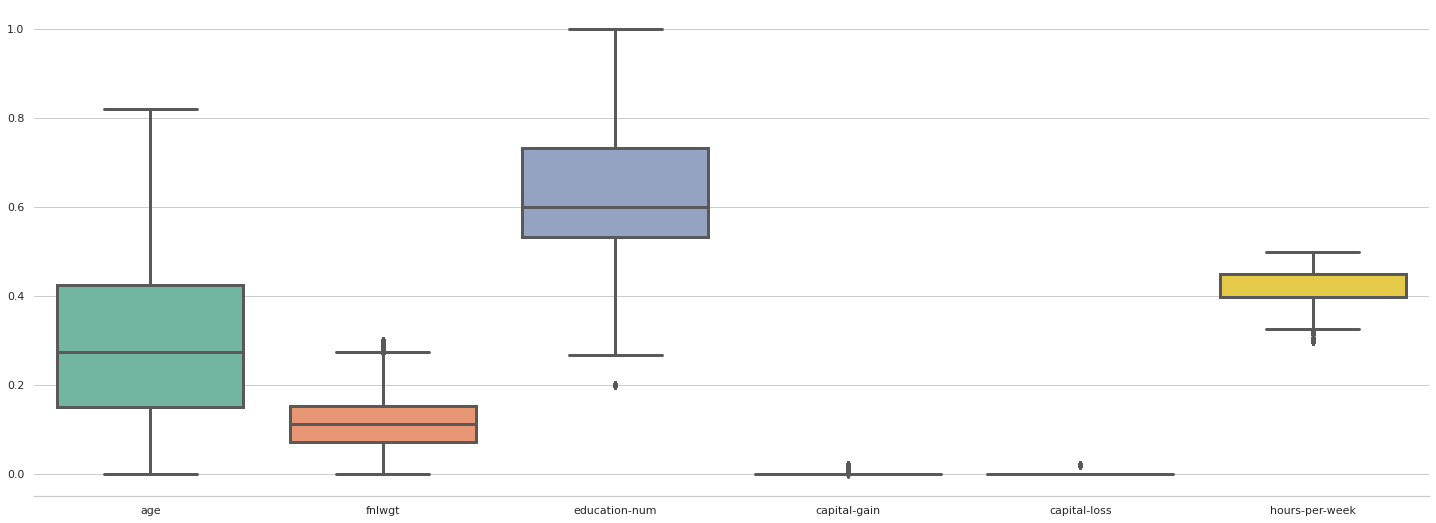

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = Data_Cuantitativo_Normalizado, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

**Ventaja**
- Reduce el impacto de datos atípicos para modelo de Machine Learning
  
**Desventaja**
- Transformación arbitraria -> datos atípicos a umbral
- Altera la naturaleza de los datos
- Genera sesgos
  
**Se recomienda para**
- Base de datos pequeña

Al comparar el diagrama original de cajas con respecto al nuevo diagrama de cajas con reducción de datos atípicos, se observa que se ha mitigado la parte de los datos atípicos, pero aún hay algunos datos de ellos. **No obstante, es necesario tener precaución a la hora de eliminar datos atípicos puesto que dependiendo del contexto de cada característica, no todos los datos atípicos deben ser eliminado. En vez de obtener mayor información de los datos, se genera el efecto contrario. Por esta razón, deben analizar el contexto de cada característica antes de eliminar datos atípicos**

**Nota:** No se aconseja determinar un dato atípico desde la media debido a que la media de los datos cambia drásticamente con la presencia de datos atípicos. Por esta razón, varias técnicas de identificación de outliers se determina a partir de la **mediana** estadística de los datos porque es un estadístico de orden que da el valor medio de una muestra. En este caso, cuando los datos están ordenados por su magnitud, la mediana se define como el valor que está en el medio de la lista de datos ordenados, haciendo más robusto para detectar presencia de outliers.

### Diagrama de Violines

Es un gráfico variante del boxplot que permite mostrar la distribución cuantitativa de los datos a través de varios niveles de variables categóticas tal que aquellas distribuciones pueden ser comparadas. Una diferencial con respecto al boxplot es que muestra una **estimación de densidad de los datos** bajo una cierta distribución de probabilidad. No obstante, la comparación entre distribuciones de datos puede estar afectada por el tamaño de las muestras, lo cual unos violines pueden ser más pequeños que otros.

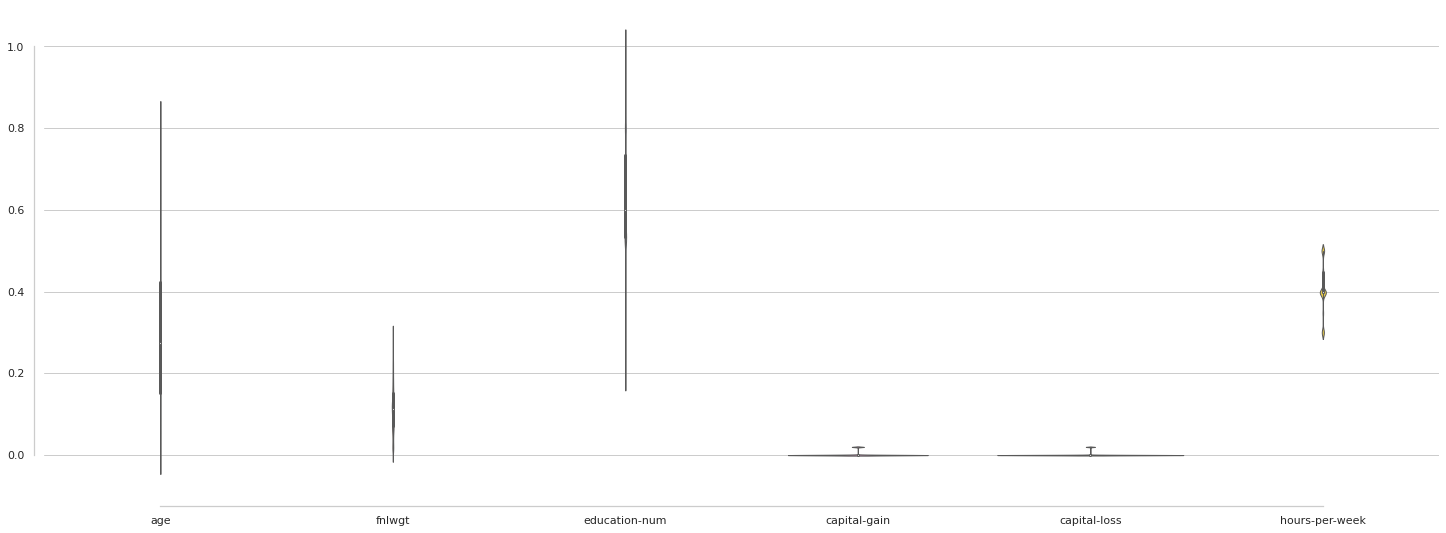

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.violinplot(data = Data_Cuantitativo_Normalizado, linewidth = 1, palette="Set2", fliersize = 2)
sns.despine(offset=10, trim=True);

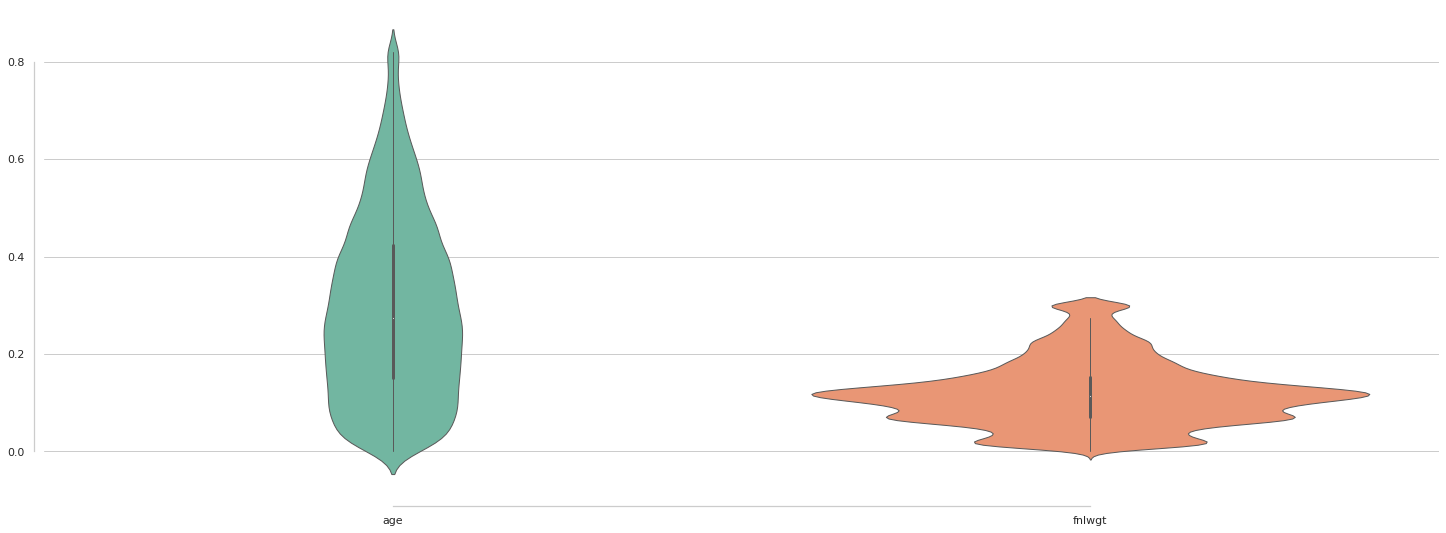

In [ ]:
sns.violinplot(data = Data_Cuantitativo_Normalizado[["age","fnlwgt"]], linewidth = 1, palette="Set2", fliersize = 2)
sns.despine(offset=10, trim=True)

Los violines dan cuenta de la dispersión

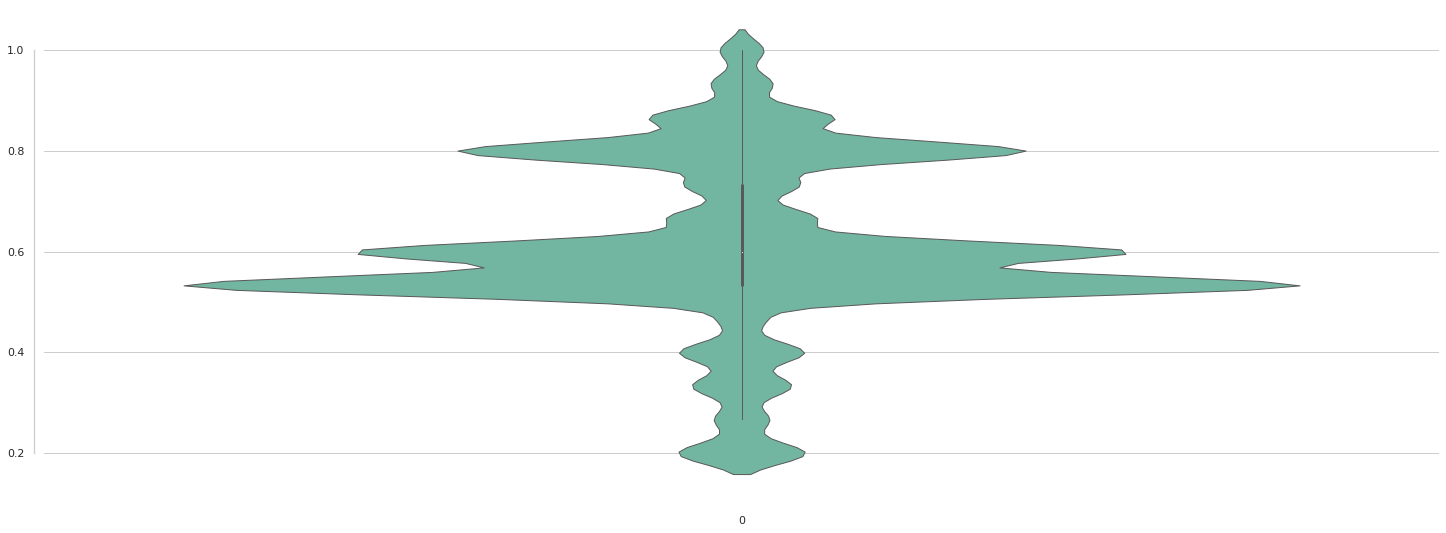

In [ ]:
sns.violinplot(data = Data_Cuantitativo_Normalizado["education-num"], linewidth = 1, palette="Set2", fliersize = 2)
sns.despine(offset=10, trim=True)

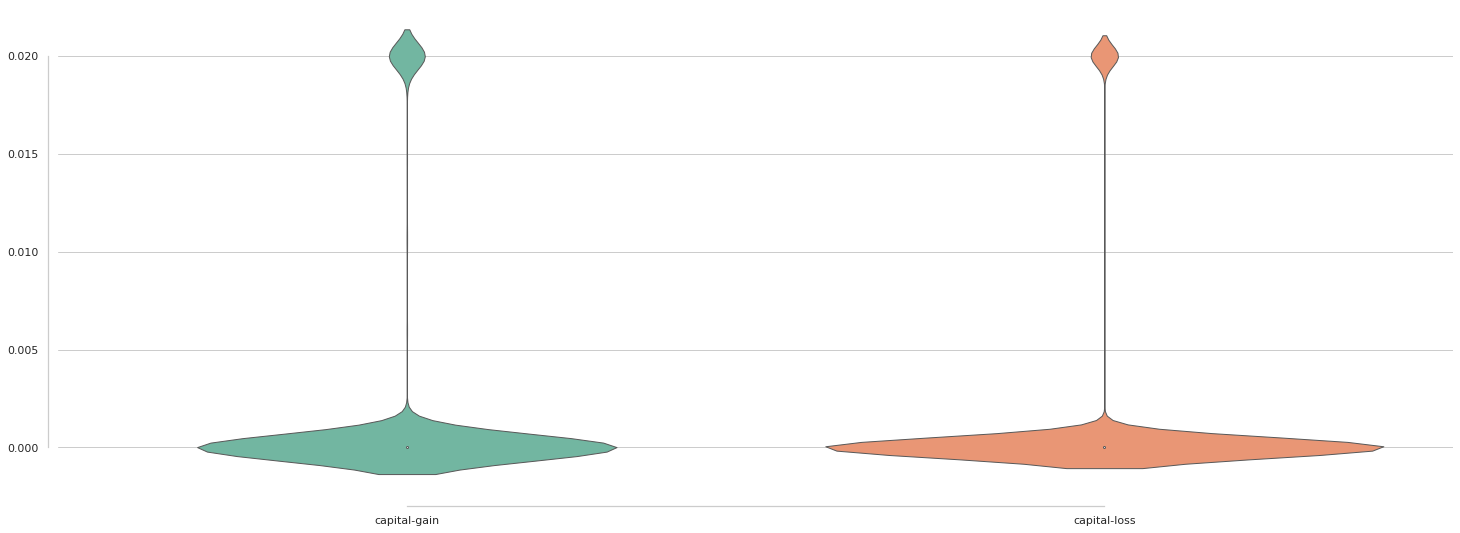

In [ ]:
sns.violinplot(data = Data_Cuantitativo_Normalizado[["capital-gain","capital-loss"]], linewidth = 1, palette="Set2", fliersize = 2)
sns.despine(offset=10, trim=True)

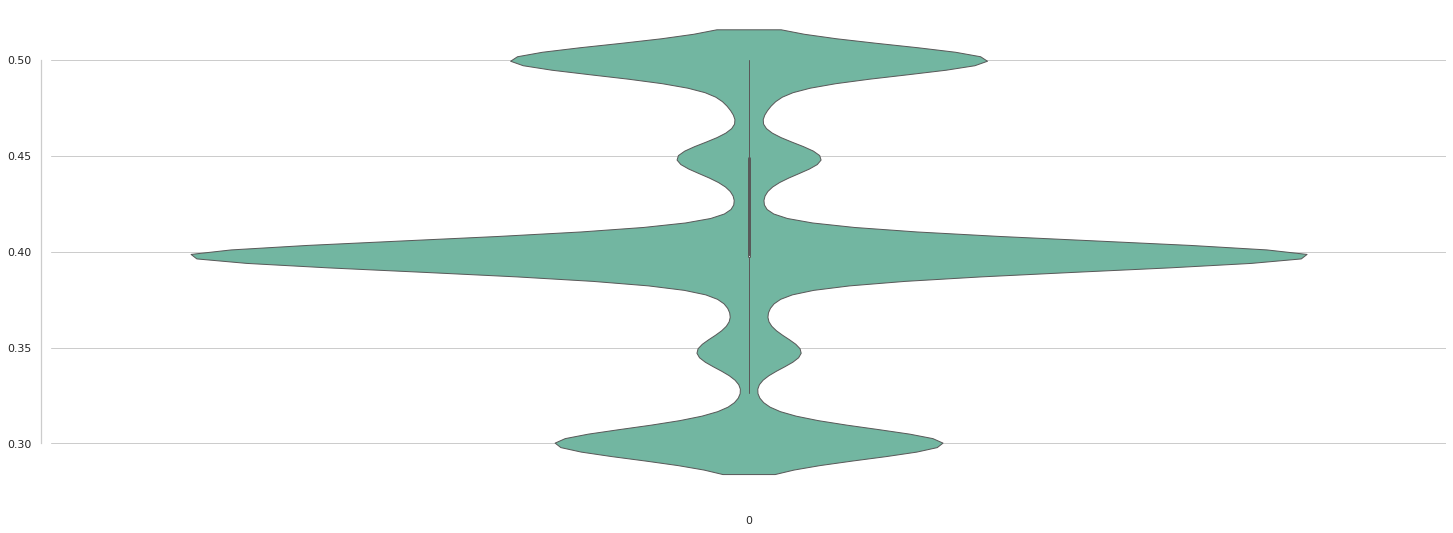

In [ ]:
sns.violinplot(data = Data_Cuantitativo_Normalizado["hours-per-week"], linewidth = 1, palette="Set2", fliersize = 2)
sns.despine(offset=10, trim=True)

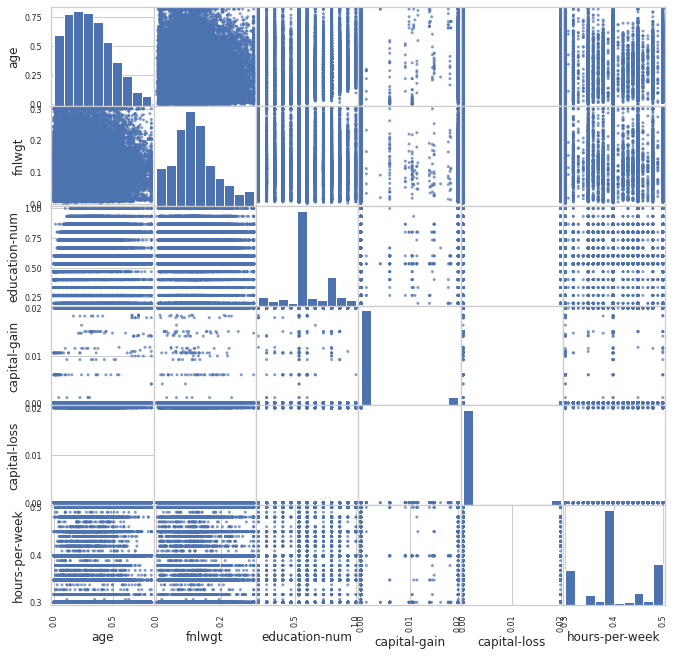

In [ ]:
pd.plotting.scatter_matrix(Data_Cuantitativo_Normalizado, alpha=0.7, figsize=(11,11)) # Grafica de dispersión e histograma
plt.show()

## Datos con Series de Tiempo

Los datos con series de tiempo es una forma de estructura de datos muy aplicados en diferentes campos, en especial, en finanzas. Usualmente, los datos con series de tiempo tienen una frecuencia de tiempo fijo, es decir, que los datos se presentan en intervalos regulares de acuerdo a alguna regla definida por un sistema o las personas que tomaron los datos. En algunos casos, los datos con series de tiempo pueden llegar a ser irregulares, lo cual no hay un patron de intervalo establecido.

Teniendo en cuenta lo anterior, vamos a mirar algunas estrategías para manejar datos con series de tiempo:

### Elementos básicos de los datos con series de tiempo

In [ ]:
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Air.xlsx"
download = requests.get(url).content
columnas = ['Date','Time','Level']
data = pd.read_excel(url, header = None, names = columnas) 
# Esimportante codificarlo a utf-8
display(data.head())

,Date,Time,Level
0,2004-03-10,18:00:00,0.757754
1,2004-03-10,19:00:00,0.725487
2,2004-03-10,20:00:00,0.750239
3,2004-03-10,21:00:00,0.786713
4,2004-03-10,22:00:00,0.788794


In [ ]:
datos_air_Date = pd.to_datetime(data['Date'], format='%Y-%m-%d') # Convertir Series Panda en Datetime
display(datos_air_Date)

0      2004-03-10
1      2004-03-10
2      2004-03-10
3      2004-03-10
4      2004-03-10
          ...    
9352   2005-04-04
9353   2005-04-04
9354   2005-04-04
9355   2005-04-04
9356   2005-04-04
Name: Date, Length: 9357, dtype: datetime64[ns]

In [ ]:
date_only = pd.DatetimeIndex(datos_air_Date.values) # Extraemos solamente las fechas y evitamos el uso de los indices 
display(date_only)

DatetimeIndex(['2004-03-10', '2004-03-10', '2004-03-10', '2004-03-10',
               '2004-03-10', '2004-03-10', '2004-03-11', '2004-03-11',
               '2004-03-11', '2004-03-11',
               ...
               '2005-04-04', '2005-04-04', '2005-04-04', '2005-04-04',
               '2005-04-04', '2005-04-04', '2005-04-04', '2005-04-04',
               '2005-04-04', '2005-04-04'],
              dtype='datetime64[ns]', length=9357, freq=None)

In [ ]:
datos_air_time = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time # Convertimos el tiempo en formato datetime64[ns]
time_only = datos_air_time.values
display(time_only)

array([datetime.time(18, 0), datetime.time(19, 0), datetime.time(20, 0),
       ..., datetime.time(12, 0), datetime.time(13, 0),
       datetime.time(14, 0)], dtype=object)

In [ ]:
# OPCIONAL
datos_air_DATE = data['Date'].apply(lambda x: pd.to_datetime(x,errors = 'coerce', format = '%Y-%m-%d')) 
# Evita errores de formato de fecha
display(datos_air_DATE) 

**coerce:** Datos digitados manualmente. Hay errores en digitación. Se utiliza esta opción para identificar esos errores y llevaros a un formato legible.

Ahora vamos a combinar la columna Date y la columna Time en un solo formato de tiempo

In [ ]:
Datos_Date_Time = pd.to_datetime(date_only.astype(str) + ' ' + time_only.astype(str))
display(Datos_Date_Time)

DatetimeIndex(['2004-03-10 18:00:00', '2004-03-10 19:00:00',
               '2004-03-10 20:00:00', '2004-03-10 21:00:00',
               '2004-03-10 22:00:00', '2004-03-10 23:00:00',
               '2004-03-11 00:00:00', '2004-03-11 01:00:00',
               '2004-03-11 02:00:00', '2004-03-11 03:00:00',
               ...
               '2005-04-04 05:00:00', '2005-04-04 06:00:00',
               '2005-04-04 07:00:00', '2005-04-04 08:00:00',
               '2005-04-04 09:00:00', '2005-04-04 10:00:00',
               '2005-04-04 11:00:00', '2005-04-04 12:00:00',
               '2005-04-04 13:00:00', '2005-04-04 14:00:00'],
              dtype='datetime64[ns]', length=9357, freq=None)

Ahora vamos a concatenar los datos de series de tiempo con los datos *Level*

In [ ]:
Datos_Date_Time_Nuevo = pd.to_datetime(datos_air_Date.astype(str) + ' ' + datos_air_time.astype(str)) 
# Se unifica datos Date y Time con los indices
datos_concatenados = pd.concat([Datos_Date_Time_Nuevo, data['Level']], axis = 1)
display(datos_concatenados)

,0,Level
0,2004-03-10 18:00:00,0.757754
1,2004-03-10 19:00:00,0.725487
2,2004-03-10 20:00:00,0.750239
3,2004-03-10 21:00:00,0.786713
4,2004-03-10 22:00:00,0.788794
...,...,...
9352,2005-04-04 10:00:00,0.756824
9353,2005-04-04 11:00:00,0.711864
9354,2005-04-04 12:00:00,0.640649
9355,2005-04-04 13:00:00,0.513866


Se puede extraer solo los valores de tiempo y de la característica *Level*, usando la siguiente línea de código

In [ ]:
datos_concatenados_sin_indices = datos_concatenados.values
display(datos_concatenados_sin_indices)

array([[Timestamp('2004-03-10 18:00:00'), 0.7577538251293606],
       [Timestamp('2004-03-10 19:00:00'), 0.7254874492424674],
       [Timestamp('2004-03-10 20:00:00'), 0.7502390673981953],
       ...,
       [Timestamp('2005-04-04 12:00:00'), 0.6406487731909309],
       [Timestamp('2005-04-04 13:00:00'), 0.5138659164714959],
       [Timestamp('2005-04-04 14:00:00'), 0.5028037058276918]],
      dtype=object)

### Funciones de Ventana de Tiempo

Las funciones de ventanado se utilizan para evaluar diferentes estadísticas como la media o la desviación estándar a través de una ventana deslizante que permite suavizar datos ruidosos o irregulares, logrando analizar de una forma más eficiente una característica de la base de datos. Usualmente, la ventana móvil puede ser de longitud fija o en algunos casos variable, de acuerdo a la necesidad del usuario. Veamos un ejemplo sencillo con una base de datos financiera

In [ ]:
datos_financieros = web.DataReader('005930', 'naver', start='2019-09-10', end='2022-06-08')
# Naver Finance provides Korean stock market (KOSPI, KOSDAQ) historical data.

In [ ]:
datos_financieros

,Open,High,Low,Close,Volume
Date,,,,,
2019-09-10,47100,47200,46550,47000,9231792
2019-09-11,47300,47400,46800,47150,16141619
2019-09-16,47000,47100,46400,47100,15550926
2019-09-17,47000,47100,46800,46900,7006280
2019-09-18,46900,47700,46800,47700,10413027
...,...,...,...,...,...
2022-05-31,67500,67500,66700,67400,24365002
2022-06-02,66600,67000,66400,66700,14959443
2022-06-03,67200,67300,66800,66800,8222883


In [ ]:
datos_financieros.reset_index(inplace=True)
display(datos_financieros)

,Date,Open,High,Low,Close,Volume
0,2019-09-10,47100,47200,46550,47000,9231792
1,2019-09-11,47300,47400,46800,47150,16141619
2,2019-09-16,47000,47100,46400,47100,15550926
3,2019-09-17,47000,47100,46800,46900,7006280
4,2019-09-18,46900,47700,46800,47700,10413027
...,...,...,...,...,...,...
671,2022-05-31,67500,67500,66700,67400,24365002
672,2022-06-02,66600,67000,66400,66700,14959443
673,2022-06-03,67200,67300,66800,66800,8222883
674,2022-06-07,66200,66400,65400,65500,19355755


In [ ]:
datos_financieros_mean = datos_financieros['Close'].rolling(window = 300, min_periods=10).mean() # Media movil 
datos_financieros_std = datos_financieros['Close'].rolling(window = 300, min_periods=10).std() # Desviación estándar móvil

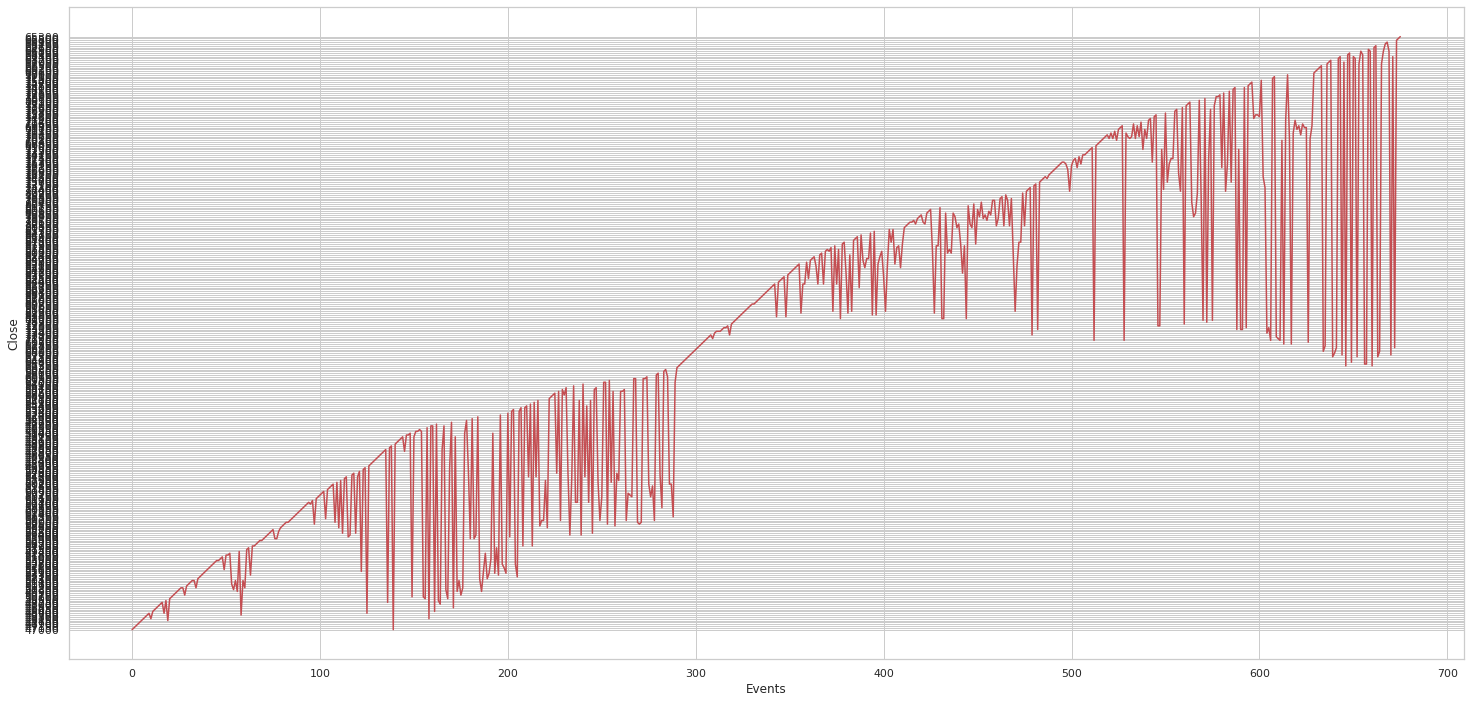

In [ ]:
fig = plt.figure(figsize=(25,12))
plt.plot(datos_financieros['Close'],'r')
plt.xlabel('Events')
plt.ylabel('Close')
plt.show()

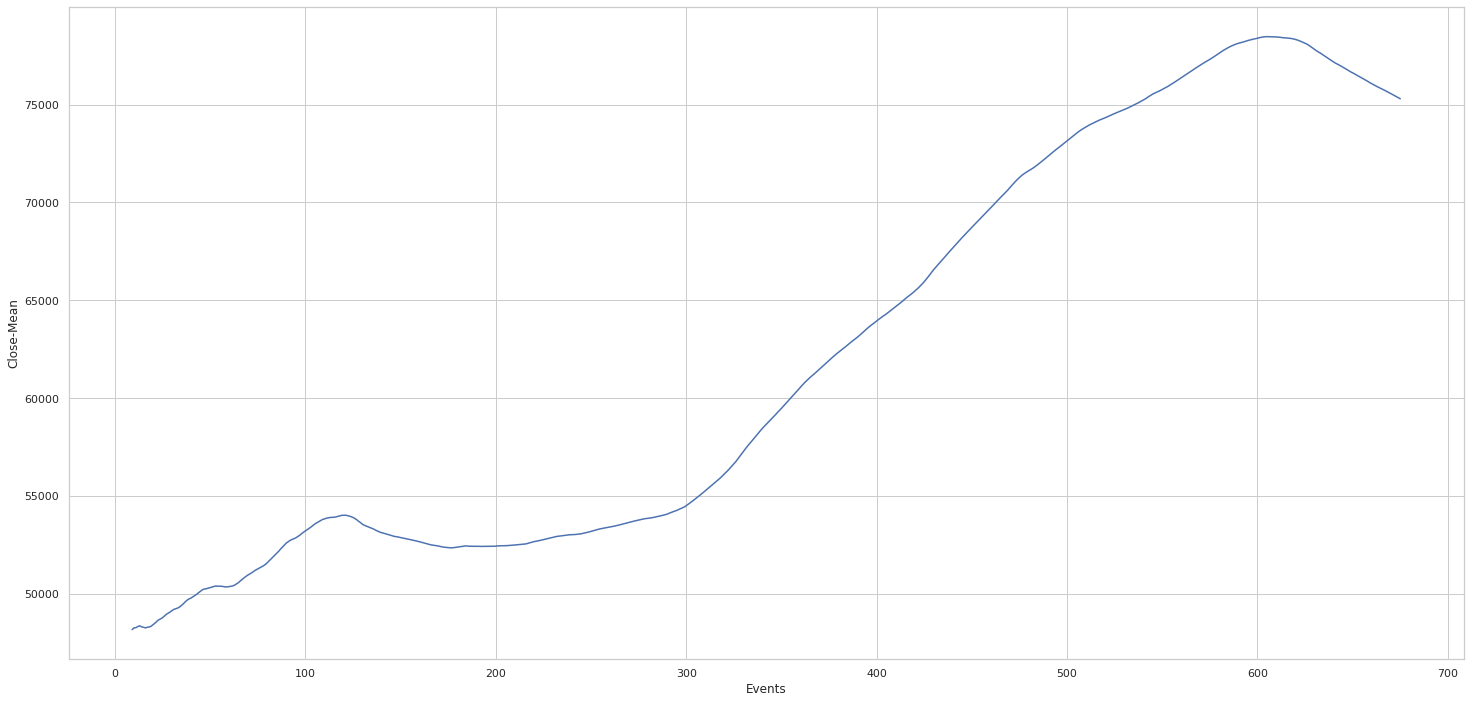

In [ ]:
fig = plt.figure(figsize=(25,12))
plt.plot(datos_financieros_mean.values)
plt.xlabel('Events')
plt.ylabel('Close-Mean')
plt.show()

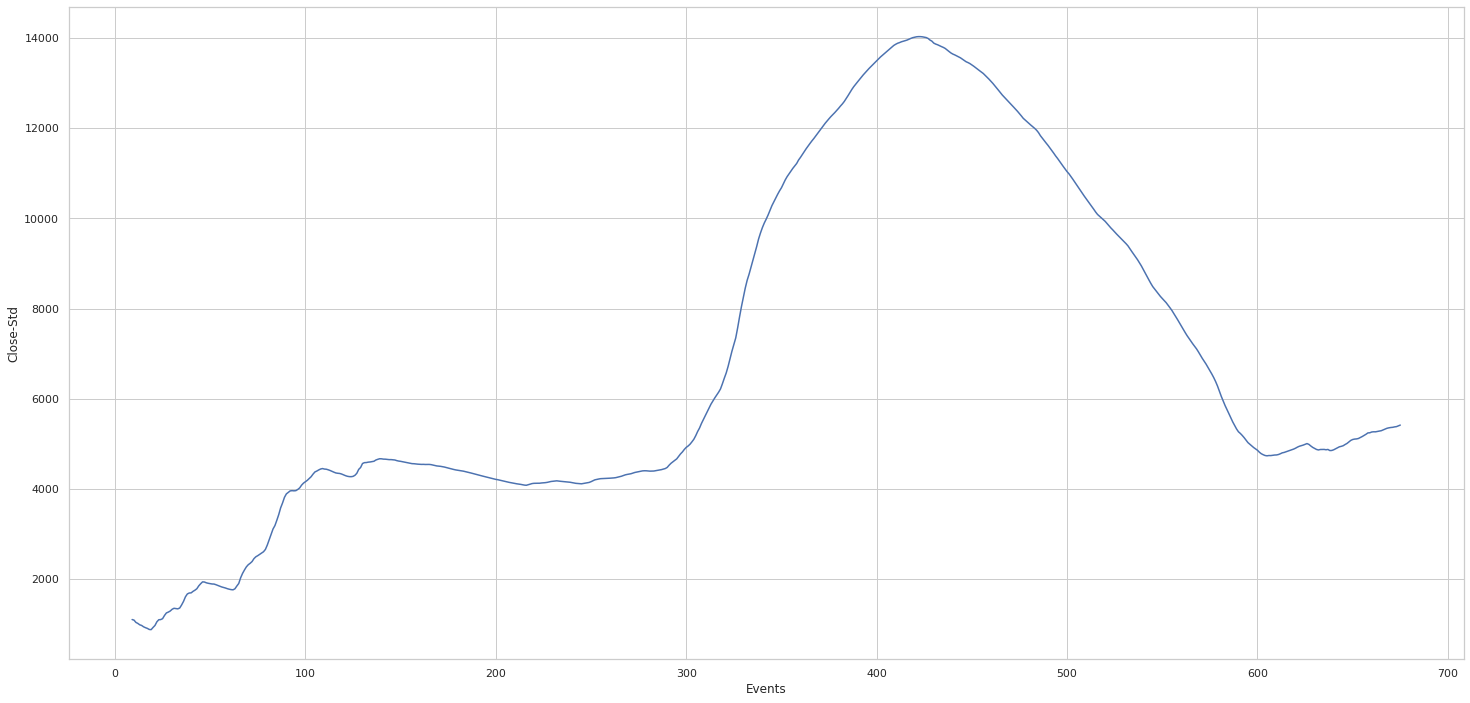

In [ ]:
fig = plt.figure(figsize=(25,12))
plt.plot(datos_financieros_std.values)
plt.xlabel('Events')
plt.ylabel('Close-Std')
plt.show()

## Tratamiento de Imágenes

### Elementos básicos para trabajar imágenes

In [ ]:
from skimage import data, io, filters, color
from keras.preprocessing.image import img_to_array, array_to_img, load_img, save_img
from PIL import Image, ImageEnhance, ImageOps, ImageChops

Cargamos una base de datos de imágenes de cohetes

In [ ]:
cohete = data.chelsea()

Visualizamos la imagen

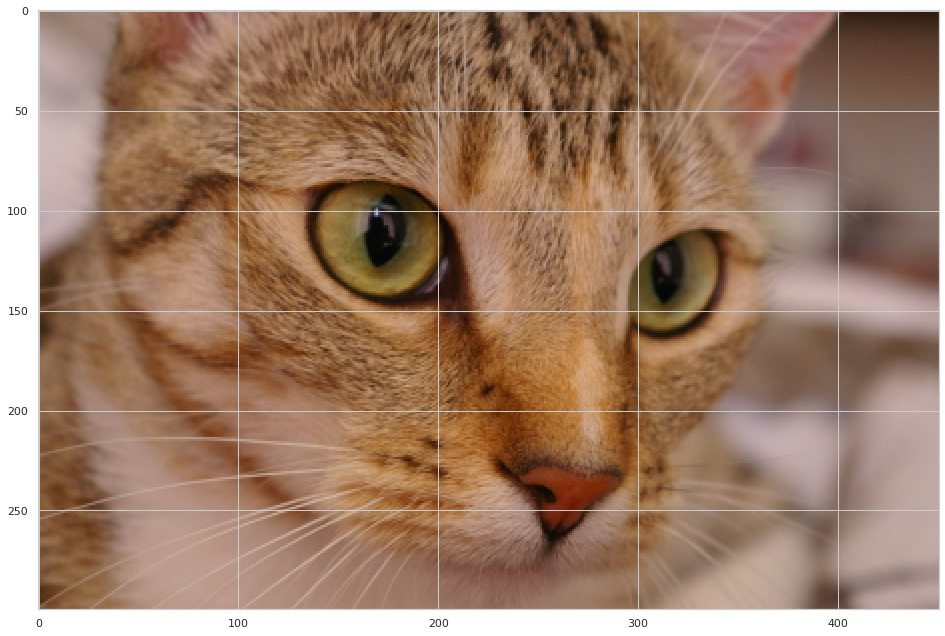

In [ ]:
io.imshow(cohete)
io.show()

Podemos determinar el tamaño de la imagen

In [ ]:
print(cohete.shape) # 427 x 640 pixeles y 3 es la escala o canal RGB

(300, 451, 3)


In [ ]:
h, w, c = cohete.shape
print('ancho:  ', w)
print('alto: ', h)
print('canal:', c)

ancho:   451
alto:  300
canal: 3


In [ ]:
print(cohete.shape[1::-1])

(451, 300)


Miremos como se puede pasar de una escala de RGB a una escala de grises

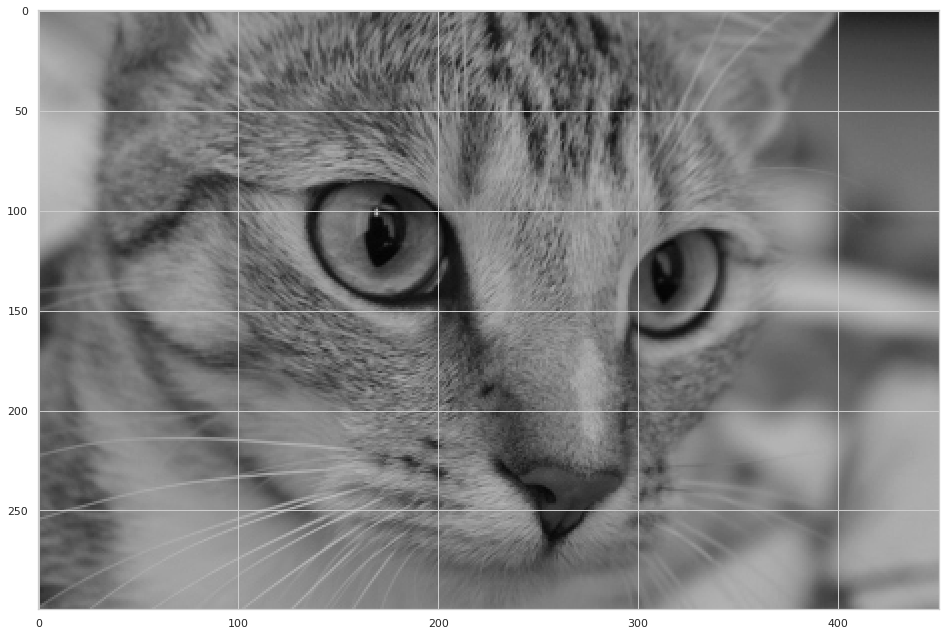

In [ ]:
cohete_escala_grises = color.rgb2gray(cohete)
io.imshow(cohete_escala_grises)
io.show()

In [ ]:
print(cohete_escala_grises.shape)

(300, 451)


Ahora miremos como se puede convertir la imagen en un arreglo de valores

In [ ]:
cohete_escala_grises_arreglo = np.asarray(cohete_escala_grises)
print(cohete_escala_grises_arreglo.shape)

(300, 451)


In [ ]:
print(cohete_escala_grises_arreglo)

[[0.48523098 0.48523098 0.47738784 ... 0.11692392 0.11692392 0.11692392]
 [0.49699569 0.49307412 0.48523098 ... 0.12336824 0.1225349  0.1272898 ]
 [0.50849255 0.50457098 0.49475569 ... 0.12336039 0.12728196 0.13120353]
 ...
 [0.24786745 0.29884784 0.40501294 ... 0.58914824 0.58914824 0.58914824]
 [0.38173647 0.42487373 0.39628392 ... 0.57403529 0.57403529 0.57795686]
 [0.42487373 0.36883294 0.36042431 ... 0.55442745 0.55442745 0.55834902]]


In [ ]:
cohete_al_255 = cohete_escala_grises_arreglo*255.0
print(cohete_al_255)

[[123.7339 123.7339 121.7339 ...  29.8156  29.8156  29.8156]
 [126.7339 125.7339 123.7339 ...  31.4589  31.2464  32.4589]
 [129.6656 128.6656 126.1627 ...  31.4569  32.4569  33.4569]
 ...
 [ 63.2062  76.2062 103.2783 ... 150.2328 150.2328 150.2328]
 [ 97.3428 108.3428 101.0524 ... 146.379  146.379  147.379 ]
 [108.3428  94.0524  91.9082 ... 141.379  141.379  142.379 ]]


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


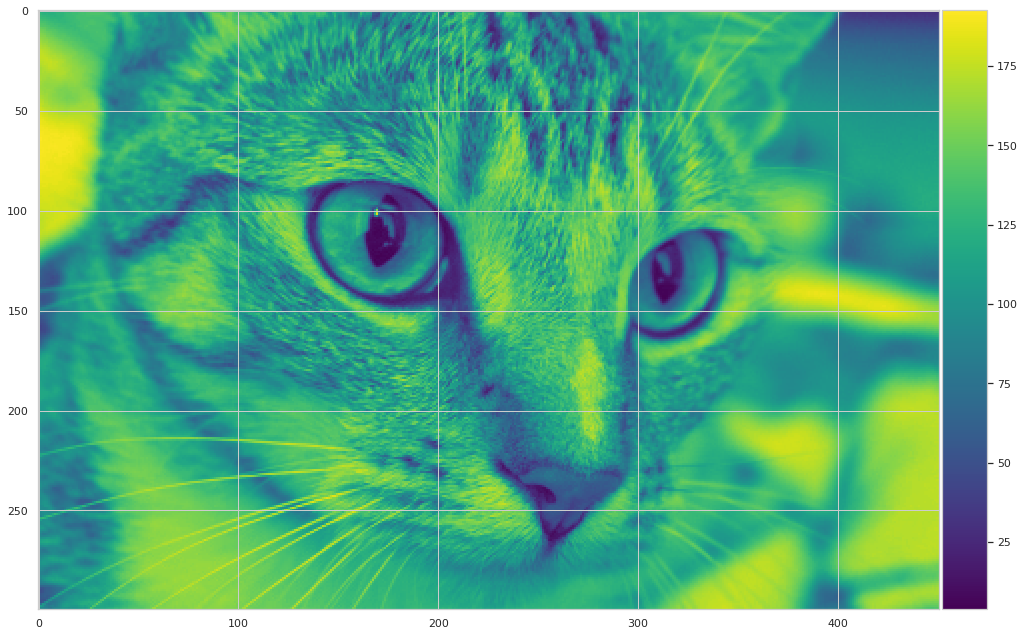

In [ ]:
io.imshow(cohete_al_255)
io.show()

In [ ]:
cohete_rgb_arreglo = np.array(cohete)
print(cohete_rgb_arreglo)

[[[143 120 104]
  [143 120 104]
  [141 118 102]
  ...
  [ 45  27  13]
  [ 45  27  13]
  [ 45  27  13]]

 [[146 123 107]
  [145 122 106]
  [143 120 104]
  ...
  [ 46  29  13]
  [ 45  29  13]
  [ 47  30  14]]

 [[148 126 112]
  [147 125 111]
  [146 122 109]
  ...
  [ 48  28  17]
  [ 49  29  18]
  [ 50  30  19]]

 ...

 [[ 92  58  30]
  [105  71  43]
  [132  98  71]
  ...
  [172 145 138]
  [172 145 138]
  [172 145 138]]

 [[128  92  60]
  [139 103  71]
  [134  95  64]
  ...
  [166 142 132]
  [166 142 132]
  [167 143 133]]

 [[139 103  71]
  [127  88  57]
  [125  86  53]
  ...
  [161 137 127]
  [161 137 127]
  [162 138 128]]]


In [ ]:
cohete_grises = cohete_rgb_arreglo/255.0
print(cohete_grises)

[[[0.56078431 0.47058824 0.40784314]
  [0.56078431 0.47058824 0.40784314]
  [0.55294118 0.4627451  0.4       ]
  ...
  [0.17647059 0.10588235 0.05098039]
  [0.17647059 0.10588235 0.05098039]
  [0.17647059 0.10588235 0.05098039]]

 [[0.57254902 0.48235294 0.41960784]
  [0.56862745 0.47843137 0.41568627]
  [0.56078431 0.47058824 0.40784314]
  ...
  [0.18039216 0.11372549 0.05098039]
  [0.17647059 0.11372549 0.05098039]
  [0.18431373 0.11764706 0.05490196]]

 [[0.58039216 0.49411765 0.43921569]
  [0.57647059 0.49019608 0.43529412]
  [0.57254902 0.47843137 0.42745098]
  ...
  [0.18823529 0.10980392 0.06666667]
  [0.19215686 0.11372549 0.07058824]
  [0.19607843 0.11764706 0.0745098 ]]

 ...

 [[0.36078431 0.22745098 0.11764706]
  [0.41176471 0.27843137 0.16862745]
  [0.51764706 0.38431373 0.27843137]
  ...
  [0.6745098  0.56862745 0.54117647]
  [0.6745098  0.56862745 0.54117647]
  [0.6745098  0.56862745 0.54117647]]

 [[0.50196078 0.36078431 0.23529412]
  [0.54509804 0.40392157 0.27843137]


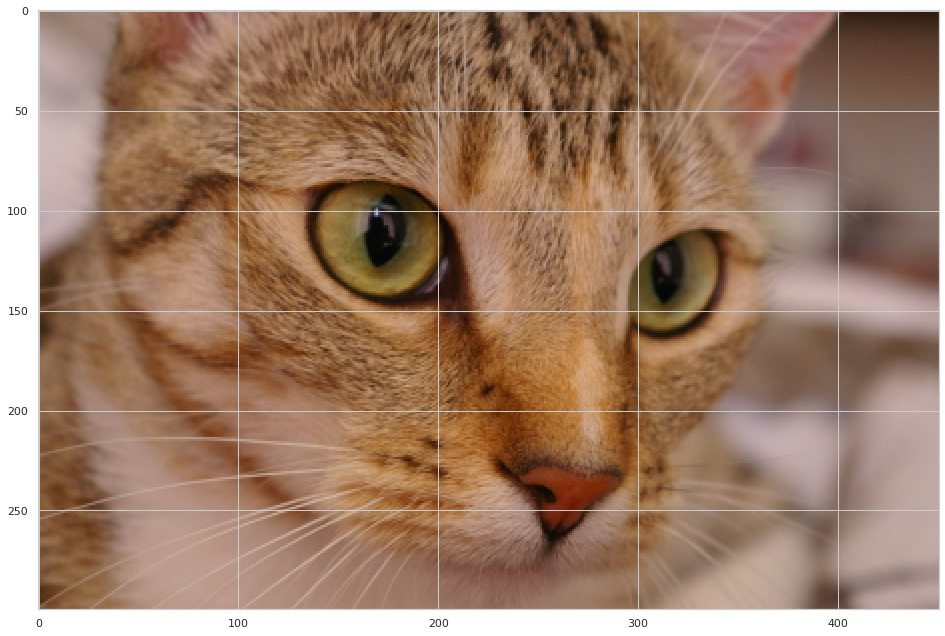

In [ ]:
io.imshow(cohete_grises)
io.show()

Usando otra estrategía para convertir una imagen en un arreglo usando la librería Keras Tensorflow

In [ ]:
cohete_arreglo = img_to_array(cohete)
print(cohete_arreglo)

[[[143. 120. 104.]
  [143. 120. 104.]
  [141. 118. 102.]
  ...
  [ 45.  27.  13.]
  [ 45.  27.  13.]
  [ 45.  27.  13.]]

 [[146. 123. 107.]
  [145. 122. 106.]
  [143. 120. 104.]
  ...
  [ 46.  29.  13.]
  [ 45.  29.  13.]
  [ 47.  30.  14.]]

 [[148. 126. 112.]
  [147. 125. 111.]
  [146. 122. 109.]
  ...
  [ 48.  28.  17.]
  [ 49.  29.  18.]
  [ 50.  30.  19.]]

 ...

 [[ 92.  58.  30.]
  [105.  71.  43.]
  [132.  98.  71.]
  ...
  [172. 145. 138.]
  [172. 145. 138.]
  [172. 145. 138.]]

 [[128.  92.  60.]
  [139. 103.  71.]
  [134.  95.  64.]
  ...
  [166. 142. 132.]
  [166. 142. 132.]
  [167. 143. 133.]]

 [[139. 103.  71.]
  [127.  88.  57.]
  [125.  86.  53.]
  ...
  [161. 137. 127.]
  [161. 137. 127.]
  [162. 138. 128.]]]


In [ ]:
cohete_escala_grises = color.rgb2gray(cohete)
cohete_arreglo_grises = img_to_array(cohete_escala_grises)
print(cohete_arreglo_grises)

[[[0.48523098]
  [0.48523098]
  [0.47738785]
  ...
  [0.11692392]
  [0.11692392]
  [0.11692392]]

 [[0.4969957 ]
  [0.49307412]
  [0.48523098]
  ...
  [0.12336823]
  [0.1225349 ]
  [0.1272898 ]]

 [[0.5084925 ]
  [0.50457096]
  [0.4947557 ]
  ...
  [0.1233604 ]
  [0.12728196]
  [0.13120353]]

 ...

 [[0.24786745]
  [0.29884785]
  [0.40501294]
  ...
  [0.5891482 ]
  [0.5891482 ]
  [0.5891482 ]]

 [[0.38173646]
  [0.42487374]
  [0.39628392]
  ...
  [0.5740353 ]
  [0.5740353 ]
  [0.57795686]]

 [[0.42487374]
  [0.36883295]
  [0.3604243 ]
  ...
  [0.55442744]
  [0.55442744]
  [0.558349  ]]]


Se guarda la imagen en escala de grises, usando una conversión de un arreglo a imagen.

In [ ]:
imagen_escala_grises = array_to_img(cohete_arreglo_grises)
imagen_escala_grises.convert("L").save("imagen_escala_grises.jpg")

### Ajuste de la imagen

Abrimos la imagen

In [ ]:
image_cargada = Image.open("imagen_escala_grises.jpg")

Aplicando un ajuste de brillo de la imagen

In [ ]:
imagen_brillo = ImageEnhance.Brightness(image_cargada).enhance(2) 
imagen_brillo.save("imagen_escala_grises_brillo.jpg")

Aplicando un contraste a la imagen

In [ ]:
image_constraste = ImageEnhance.Contrast(image_cargada).enhance(4)
image_constraste.save("image_constraste.jpg")

Aplicando un ajuste a la nitidez de la imagen

In [ ]:
image_nitidez = ImageEnhance.Sharpness(image_cargada).enhance(3)
image_nitidez.save("image_nitidez.jpg")

Cambiando el tamaño de las imagénes

In [ ]:
nueva_imagen = image_cargada.resize((128, 64))
nueva_imagen.save("nueva_imagen.jpg")

Aplicando un espejo a la imagen (invierte la dirección de la imagen)

In [ ]:
imagen_espejo = ImageOps.mirror(image_cargada)
imagen_espejo.save("imagen_espejo.jpg")

Aplicando una inversión de colores

In [ ]:
imagen_invertida = ImageChops.invert(image_cargada)
imagen_invertida.save("imagen_invertida.jpg")